## Lyft Takehome

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Read in data sets 

In [2]:
rider = pd.read_csv('ride_data.csv')

In [3]:
experiment = pd.read_csv('experiment_data.csv')

In [4]:
experiment.head()

,rider_id,variant,cancel_penalty
0,+++3990cLNPGgaPm+ripGg==,control,5.0
1,+++stf7DqWcT8LMTYbXrwA==,control,5.0
2,++07zTPYFhvA5Ug72kRd0w==,treatment1,3.0
3,++08hetKFBNoOO5XHAH/5A==,treatment2,1.0
4,++0YwCvnfyMWSNH3wpyP1g==,treatment2,1.0


In [5]:
experiment.rider_id.nunique()

530756

In [104]:
rider.head()

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,requested_at_local,accepted_at_local,arrived_at_local,picked_up_at_local,dropped_off_at_local,actual_time_to_arrival,cancellation_flag,rider_request_number
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,standard,12.13,17.40,60.0,21.0,2019-05-04 14:08:33.000 America/Los_Angeles,2019-05-04 14:08:43.775 America/Los_Angeles,2019-05-04 14:09:21.508 America/Los_Angeles,2019-05-04 14:10:02.000 America/Los_Angeles,2019-05-04 14:22:34.000 America/Los_Angeles,37.0,0,1
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,NaN,standard,77.76,1.00,60.0,NaN,2019-05-03 15:26:37.000 America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,1,1
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,standard,7.82,8.17,360.0,541.0,2019-05-10 19:26:29.000 America/Los_Angeles,2019-05-10 19:27:00.632 America/Los_Angeles,2019-05-10 19:37:22.502 America/Los_Angeles,2019-05-10 19:37:24.000 America/Los_Angeles,2019-05-10 19:44:22.000 America/Los_Angeles,621.0,0,2
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,standard,14.76,14.82,60.0,126.0,2019-05-10 23:39:07.000 America/Los_Angeles,2019-05-10 23:39:32.725 America/Los_Angeles,2019-05-10 23:42:24.283 America/Los_Angeles,2019-05-10 23:42:28.000 America/Los_Angeles,2019-05-11 00:02:06.000 America/Los_Angeles,171.0,0,1
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,standard,18.05,17.78,360.0,587.0,2019-05-08 13:52:08.000 America/Los_Angeles,2019-05-08 13:53:24.871 America/Los_Angeles,2019-05-08 14:03:34.987 America/Los_Angeles,2019-05-08 14:03:39.000 America/Los_Angeles,2019-05-08 14:18:35.000 America/Los_Angeles,610.0,0,1


In [110]:
rider.driver_id.nunique()

36385

In [7]:
rider.rider_id.nunique()

530756

In [8]:
rider.dtypes

ride_id                     object
rider_id                    object
driver_id                   object
ride_type                   object
upfront_fare               float64
rider_paid_amount          float64
eta_to_rider_pre_match     float64
eta_to_rider_post_match    float64
requested_at_local          object
accepted_at_local           object
arrived_at_local            object
picked_up_at_local          object
dropped_off_at_local        object
actual_time_to_arrival     float64
cancellation_flag            int64
rider_request_number         int64
dtype: object

In [9]:
rider.shape

(1402312, 16)

In [10]:
experiment.shape

(530756, 3)

In [11]:
merged = pd.merge(rider,experiment,how='left',on='rider_id')

In [12]:
merged.head()

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,requested_at_local,accepted_at_local,arrived_at_local,picked_up_at_local,dropped_off_at_local,actual_time_to_arrival,cancellation_flag,rider_request_number,variant,cancel_penalty
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,standard,12.13,17.40,60.0,21.0,2019-05-04 14:08:33.000 America/Los_Angeles,2019-05-04 14:08:43.775 America/Los_Angeles,2019-05-04 14:09:21.508 America/Los_Angeles,2019-05-04 14:10:02.000 America/Los_Angeles,2019-05-04 14:22:34.000 America/Los_Angeles,37.0,0,1,treatment1,3.0
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,NaN,standard,77.76,1.00,60.0,NaN,2019-05-03 15:26:37.000 America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,1,1,treatment2,1.0
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,standard,7.82,8.17,360.0,541.0,2019-05-10 19:26:29.000 America/Los_Angeles,2019-05-10 19:27:00.632 America/Los_Angeles,2019-05-10 19:37:22.502 America/Los_Angeles,2019-05-10 19:37:24.000 America/Los_Angeles,2019-05-10 19:44:22.000 America/Los_Angeles,621.0,0,2,treatment2,1.0
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,standard,14.76,14.82,60.0,126.0,2019-05-10 23:39:07.000 America/Los_Angeles,2019-05-10 23:39:32.725 America/Los_Angeles,2019-05-10 23:42:24.283 America/Los_Angeles,2019-05-10 23:42:28.000 America/Los_Angeles,2019-05-11 00:02:06.000 America/Los_Angeles,171.0,0,1,treatment2,1.0
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,standard,18.05,17.78,360.0,587.0,2019-05-08 13:52:08.000 America/Los_Angeles,2019-05-08 13:53:24.871 America/Los_Angeles,2019-05-08 14:03:34.987 America/Los_Angeles,2019-05-08 14:03:39.000 America/Los_Angeles,2019-05-08 14:18:35.000 America/Los_Angeles,610.0,0,1,treatment2,1.0


### We only consider rides that are accepted by dirvers - remove records whose accepted time are null value

In [13]:
merged = merged[merged['accepted_at_local'].notnull()]

In [14]:
merged.head()

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,requested_at_local,accepted_at_local,arrived_at_local,picked_up_at_local,dropped_off_at_local,actual_time_to_arrival,cancellation_flag,rider_request_number,variant,cancel_penalty
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,standard,12.13,17.40,60.0,21.0,2019-05-04 14:08:33.000 America/Los_Angeles,2019-05-04 14:08:43.775 America/Los_Angeles,2019-05-04 14:09:21.508 America/Los_Angeles,2019-05-04 14:10:02.000 America/Los_Angeles,2019-05-04 14:22:34.000 America/Los_Angeles,37.0,0,1,treatment1,3.0
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,standard,7.82,8.17,360.0,541.0,2019-05-10 19:26:29.000 America/Los_Angeles,2019-05-10 19:27:00.632 America/Los_Angeles,2019-05-10 19:37:22.502 America/Los_Angeles,2019-05-10 19:37:24.000 America/Los_Angeles,2019-05-10 19:44:22.000 America/Los_Angeles,621.0,0,2,treatment2,1.0
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,standard,14.76,14.82,60.0,126.0,2019-05-10 23:39:07.000 America/Los_Angeles,2019-05-10 23:39:32.725 America/Los_Angeles,2019-05-10 23:42:24.283 America/Los_Angeles,2019-05-10 23:42:28.000 America/Los_Angeles,2019-05-11 00:02:06.000 America/Los_Angeles,171.0,0,1,treatment2,1.0
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,standard,18.05,17.78,360.0,587.0,2019-05-08 13:52:08.000 America/Los_Angeles,2019-05-08 13:53:24.871 America/Los_Angeles,2019-05-08 14:03:34.987 America/Los_Angeles,2019-05-08 14:03:39.000 America/Los_Angeles,2019-05-08 14:18:35.000 America/Los_Angeles,610.0,0,1,treatment2,1.0
5,KnVKQ9elwO31aM3iCpu0dw==,BKq3XImCug8HXxVMUQpDCA==,cn/zU9H/1KnSAR67BKfpgA==,standard,11.43,11.45,60.0,77.0,2019-05-08 17:24:53.000 America/Los_Angeles,2019-05-08 17:24:59.647 America/Los_Angeles,2019-05-08 17:25:42.562 America/Los_Angeles,2019-05-08 17:26:42.000 America/Los_Angeles,2019-05-08 17:39:24.000 America/Los_Angeles,42.0,0,1,control,5.0


### Feature Engineering 

In [15]:
merged['ride_requested_time'] = merged['requested_at_local'].str[0:19].astype(str)#.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
merged['ride_accepted_time'] = merged['accepted_at_local'].str[0:19].astype(str)#.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
merged['ride_arrived_time'] = merged['arrived_at_local'].str[0:19].astype(str)#.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
merged['ride_pickup_time'] = merged['picked_up_at_local'].str[0:19].astype(str)#.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
merged['ride_dropoff_time'] = merged['dropped_off_at_local'].str[0:19].astype(str)#.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
merged['ride_location'] = merged['picked_up_at_local'].str[24:]


In [16]:
merged['ride_requested_time'] = merged['ride_requested_time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S") if x != 'nan' else 'null')
merged['ride_accepted_time'] = merged['ride_accepted_time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S") if x != 'nan' else 'null')
merged['ride_arrived_time'] = merged['ride_arrived_time'].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S") if x!= 'nan' else 'null')
merged['ride_pickup_time'] = merged['ride_pickup_time'].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S") if x!= 'nan' else 'null')
merged['ride_dropoff_time'] = merged['ride_dropoff_time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S") if x!= 'nan' else 'null')


In [17]:
merged['ride_eta_diff'] = merged['eta_to_rider_post_match'] - merged['eta_to_rider_pre_match']
merged['ride_wait_time_before_accept'] = merged['ride_accepted_time'] - merged['ride_requested_time']


In [18]:
merged.ride_accepted_time.max()

Timestamp('2019-05-26 17:01:19')

In [19]:
merged.ride_accepted_time.min()

Timestamp('2019-04-14 17:00:08')

### Derive week day and rush hour flag variable for each ride
#### Google "Rush hour in Los Angeles"
#### In this exercise, we define "rush hour" based on the accepted time of a ride. When the accepted time of a ride is during weekday and within certain range of time, it's defined as rush hour.  

In [20]:
merged['dayofweek'] = merged['ride_accepted_time'].apply(lambda x: x.weekday())
merged['weekday_flag'] = np.where(merged['dayofweek'].isin([0,1,2,3,4]),1,0)
merged['hourofride'] = merged['ride_accepted_time'].apply(lambda x:x.hour)
merged['rush_hour_flag'] = np.where((merged['weekday_flag'] == 1) & 
                                    (merged['hourofride'].isin([7,8,9,16,17,18])),1,0)

In [21]:
merged.head()

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,requested_at_local,accepted_at_local,...,ride_arrived_time,ride_pickup_time,ride_dropoff_time,ride_location,ride_eta_diff,ride_wait_time_before_accept,dayofweek,weekday_flag,hourofride,rush_hour_flag
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,standard,12.13,17.40,60.0,21.0,2019-05-04 14:08:33.000 America/Los_Angeles,2019-05-04 14:08:43.775 America/Los_Angeles,...,2019-05-04 14:09:21,2019-05-04 14:10:02,2019-05-04 14:22:34,America/Los_Angeles,-39.0,00:00:10,5,0,14,0
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,standard,7.82,8.17,360.0,541.0,2019-05-10 19:26:29.000 America/Los_Angeles,2019-05-10 19:27:00.632 America/Los_Angeles,...,2019-05-10 19:37:22,2019-05-10 19:37:24,2019-05-10 19:44:22,America/Los_Angeles,181.0,00:00:31,4,1,19,0
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,standard,14.76,14.82,60.0,126.0,2019-05-10 23:39:07.000 America/Los_Angeles,2019-05-10 23:39:32.725 America/Los_Angeles,...,2019-05-10 23:42:24,2019-05-10 23:42:28,2019-05-11 00:02:06,America/Los_Angeles,66.0,00:00:25,4,1,23,0
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,standard,18.05,17.78,360.0,587.0,2019-05-08 13:52:08.000 America/Los_Angeles,2019-05-08 13:53:24.871 America/Los_Angeles,...,2019-05-08 14:03:34,2019-05-08 14:03:39,2019-05-08 14:18:35,America/Los_Angeles,227.0,00:01:16,2,1,13,0
5,KnVKQ9elwO31aM3iCpu0dw==,BKq3XImCug8HXxVMUQpDCA==,cn/zU9H/1KnSAR67BKfpgA==,standard,11.43,11.45,60.0,77.0,2019-05-08 17:24:53.000 America/Los_Angeles,2019-05-08 17:24:59.647 America/Los_Angeles,...,2019-05-08 17:25:42,2019-05-08 17:26:42,2019-05-08 17:39:24,America/Los_Angeles,17.0,00:00:06,2,1,17,1


### Get total number of rides for each rider

In [102]:
df_ride_count = merged.groupby(['rider_id'])['ride_id'].count().reset_index()
df_ride_count.columns = ['rider_id','ride_count']
df_merged_1 = pd.merge(merged,df_ride_count,on=['rider_id'],how='left')

In [114]:
df_ride_count.max()

rider_id      zzzhpNF1l7HdwyBef3huRw==
ride_count                         107
dtype: object

### Get total number of canceled rides for each rider
### Calculate cancel rate for each rider: # of cancelled ride / # of total ride

In [30]:
df_cancel_count = df_merged_1.groupby(['rider_id']).cancellation_flag.sum().reset_index()
df_cancel_count.columns = ['rider_id','cancel_count']

In [134]:
df_cancel_count.cancel_count.value_counts().plot(kind='bar')

In [150]:
df_cancel_count[df_cancel_count['cancel_count'] > 10].cancel_count.value_counts().plot(kind='bar')

In [156]:
total = df_cancel_count.shape[0]

In [159]:
df_cancel_count[df_cancel_count['cancel_count'] == 0 ].rider_id.count()/total
df_cancel_count[(df_cancel_count['cancel_count'] > 0) & (df_cancel_count['cancel_count'] < 10)].rider_id.count()/total
df_cancel_count[df_cancel_count['cancel_count'] > 10].rider_id.count()/total

0.0018670045055771997

In [169]:
df_tier1 = df_cancel_count[df_cancel_count['cancel_count'] == 0 ]['rider_id']
df_tier2 = pd.DataFrame(df_cancel_count[(df_cancel_count['cancel_count'] > 0) & (df_cancel_count['cancel_count'] < 10)]['rider_id'])
df_tier3 = pd.DataFrame(df_cancel_count[df_cancel_count['cancel_count'] > 10]['rider_id'])

df_tier2_new = pd.merge(df_merged_1, df_tier2, how = 'inner', on = 'rider_id')
df_tier2_final = df_tier2_new[df_tier2_new['cancellation_flag'] != 0]

df_tier3_new = pd.merge(df_merged_1, df_tier3, how = 'inner', on = 'rider_id')
df_tier3_final = df_tier3_new[df_tier3_new['cancellation_flag'] != 0]




In [172]:
df_tier2_final['loss'] = df_tier2_final['upfront_fare'] - df_tier2_final['rider_paid_amount']
df_tier3_final['loss'] = df_tier3_final['upfront_fare'] - df_tier3_final['rider_paid_amount']


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [174]:
df_tier2_final.loss.sum()

1820033.370000028

In [175]:
df_tier3_final.loss.sum()

139476.37999999977

In [171]:
df_tier2_new 

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,requested_at_local,accepted_at_local,...,ride_pickup_time,ride_dropoff_time,ride_location,ride_eta_diff,ride_wait_time_before_accept,dayofweek,weekday_flag,hourofride,rush_hour_flag,ride_count
0,Ly/nxWdD51vkqzI4LgJhKQ==,Bz8ZlE7ahN64/ApFVQPCmw==,51pUqsHVRkgP0QJIKEDrFQ==,standard,19.10,19.12,60.0,159.0,2019-04-26 17:20:55.000 America/Los_Angeles,2019-04-26 17:21:24.470 America/Los_Angeles,...,2019-04-26 17:25:04,2019-04-26 17:52:17,America/Los_Angeles,99.0,00:00:29,4,1,17,1,3
1,Pk/IkETyjf7t0q9XlvSNfw==,Bz8ZlE7ahN64/ApFVQPCmw==,zX/oTJQCHK4xZQNgL6hxRg==,shared,14.04,3.00,292.0,389.0,2019-05-15 17:31:52.000 America/Los_Angeles,2019-05-15 17:32:35.287 America/Los_Angeles,...,null,null,NaN,97.0,00:00:43,2,1,17,1,3
2,MyohtEb1JbnbxsJT31K8RQ==,Bz8ZlE7ahN64/ApFVQPCmw==,aFVhGWoyWMgjS1FedE/v3A==,shared,5.38,5.10,202.0,354.0,2019-05-23 21:03:15.000 America/Los_Angeles,2019-05-23 21:03:29.071 America/Los_Angeles,...,2019-05-23 21:09:33,2019-05-23 21:16:13,America/Los_Angeles,152.0,00:00:14,3,1,21,0,3
3,NmD3taZ6t4SF6UowOguAuQ==,C5t06/riHBnBu+5FA0YSAQ==,5z7qMYk0vzvep0YtJRa0VA==,shared,5.28,5.00,780.0,802.0,2019-05-09 07:25:34.000 America/Los_Angeles,2019-05-09 07:25:51.522 America/Los_Angeles,...,null,null,NaN,22.0,00:00:17,3,1,7,1,1
4,KwUlsfGePnWzduJlUTGWwQ==,D1L6oSQGrxgnCffWz5UywA==,1NWf+nIQD0FPXrGzqqCGAQ==,standard,68.72,5.00,304.0,272.0,2019-05-19 15:14:46.000 America/Los_Angeles,2019-05-19 15:14:52.972 America/Los_Angeles,...,null,null,NaN,-32.0,00:00:06,6,0,15,0,1
5,CnQhK1Nb9IAXvKdQ94KwMQ==,H1LSHIctHwxD7dCFbgd6sQ==,ZViTjbp4mG9JPfxzJqrPZg==,shared,5.62,5.85,441.0,72.0,2019-04-22 09:52:02.000 America/Los_Angeles,2019-04-22 09:52:07.809 America/Los_Angeles,...,2019-04-22 09:55:42,2019-04-22 10:02:55,America/Los_Angeles,-369.0,00:00:05,0,1,9,1,13
6,BMlWk3p/4OfzJKCV8T/p2w==,H1LSHIctHwxD7dCFbgd6sQ==,zlXbe4Pw4etKtBaeouaJ0g==,shared,7.04,7.18,214.0,97.0,2019-04-22 12:13:21.000 America/Los_Angeles,2019-04-22 12:13:31.297 America/Los_Angeles,...,2019-04-22 12:14:48,2019-04-22 12:22:53,America/Los_Angeles,-117.0,00:00:10,0,1,12,0,13
7,JIIlyY9Kraxj2aOWWZkg6g==,H1LSHIctHwxD7dCFbgd6sQ==,hieTjfHAA9AOGrY3J2BSww==,shared,6.37,6.57,307.0,185.0,2019-04-24 10:14:39.000 America/Los_Angeles,2019-04-24 10:14:59.917 America/Los_Angeles,...,2019-04-24 10:21:44,2019-04-24 10:28:43,America/Los_Angeles,-122.0,00:00:20,2,1,10,0,13
8,FgB4UR5xIwkxoBi52LVd6A==,H1LSHIctHwxD7dCFbgd6sQ==,59GZLHB75TrGBeJd2qnFBw==,shared,6.46,6.13,392.0,226.0,2019-04-26 10:19:29.000 America/Los_Angeles,2019-04-26 10:19:53.622 America/Los_Angeles,...,2019-04-26 10:23:06,2019-04-26 10:31:11,America/Los_Angeles,-166.0,00:00:24,4,1,10,0,13
9,NiLZVVBIH36SlEq4lHhXwQ==,H1LSHIctHwxD7dCFbgd6sQ==,WdAWohLHMlQeSr0oZWGzug==,shared,6.18,6.42,214.0,119.0,2019-05-02 09:50:50.000 America/Los_Angeles,2019-05-02 09:51:06.390 America/Los_Angeles,...,2019-05-02 09:52:58,2019-05-02 10:00:56,America/Los_Angeles,-95.0,00:00:16,3,1,9,1,13


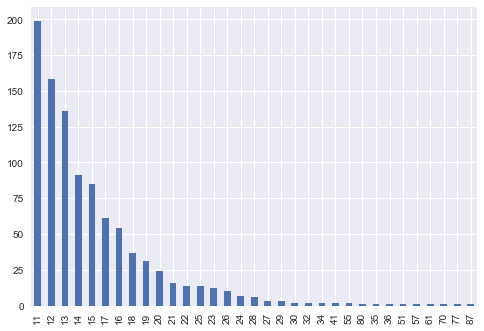

In [151]:
plt.show()

In [178]:
df_cancel_count[df_cancel_count['cancel_count'] != 0]

,rider_id,cancel_count
1,+++stf7DqWcT8LMTYbXrwA==,1
3,++08hetKFBNoOO5XHAH/5A==,2
13,++4T4lo25J4TG9rjjaLaRQ==,1
38,++HJ9WV9oDnBzaJmgpGH6g==,1
42,++IsQPHwFfRh9p+wQ9f5yw==,1
48,++KtYlC0bZrR8yxVqmLQkg==,1
55,++NQxfvQzz9zittKKBDCKQ==,1
57,++P5AmrwdTZMY5edtssA7A==,1
65,++TUfAcn7nJdkTUKTf7W4g==,1
68,++Uq+pl9HwsvvDuua8N02A==,1


In [33]:
df_cancel_rate = pd.merge(df_ride_count, df_cancel_count, on = ['rider_id'], how = 'left')
df_cancel_rate['cancel_rate'] = df_cancel_rate['cancel_count']/df_cancel_rate['ride_count']


In [38]:
df_merged_2 = pd.merge(df_merged_1, df_cancel_rate, on=['rider_id', 'ride_count'], how='left')

In [94]:
df_merged_2.ride_count.unique()

array([  1,   2,   3,  14,   4,  13,   7,   6,  10,   5,   8,  23,  11,
        15,   9,  18,  17,  12,  20,  26,  22,  19,  27,  16,  28,  21,
        25,  35,  37,  30,  31,  24,  43,  33,  29,  32,  39,  34,  50,
        41,  38,  36,  48,  40,  45,  54,  55,  46,  44,  61,  84,  60,
       107,  52,  85,  42,  58,  59,  75,  56,  90,  73])

### Compare number of cancellations for different penalty 

In [40]:
df_merged_2.groupby(['cancel_penalty']).agg({'cancel_rate':'mean',
                                             'cancel_count':'sum'}).reset_index()

,cancel_penalty,cancel_rate,cancel_count
0,1.0,0.168794,548883
1,3.0,0.133506,425293
2,5.0,0.078984,229506


### Compare $ 

In [41]:
df_lost_money = df_merged_2[df_merged_2['cancellation_flag']==1].groupby(['cancel_penalty']).agg({'upfront_fare':'sum',
                                                                                                  'ride_id': 'count'}).reset_index()


df_lost_money['total_penalty'] = df_lost_money['cancel_penalty'] * df_lost_money['ride_id']

df_lost_money['net_loss'] = df_lost_money['upfront_fare'] - df_lost_money['total_penalty']



In [42]:
df_lost_money

,cancel_penalty,upfront_fare,ride_id,total_penalty,net_loss
0,1.0,1073695.63,77528,77528.0,996167.63
1,3.0,857312.41,61252,183756.0,673556.41
2,5.0,493341.27,35518,177590.0,315751.27


### Customer Segmentation 

In [119]:
df_merged_2.head()

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,requested_at_local,accepted_at_local,...,ride_location,ride_eta_diff,ride_wait_time_before_accept,dayofweek,weekday_flag,hourofride,rush_hour_flag,ride_count,cancel_count,cancel_rate
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,standard,12.13,17.40,60.0,21.0,2019-05-04 14:08:33.000 America/Los_Angeles,2019-05-04 14:08:43.775 America/Los_Angeles,...,America/Los_Angeles,-39.0,10.0,5,0,14,0,1,0,0.0
1,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,standard,7.82,8.17,360.0,541.0,2019-05-10 19:26:29.000 America/Los_Angeles,2019-05-10 19:27:00.632 America/Los_Angeles,...,America/Los_Angeles,181.0,31.0,4,1,19,0,1,0,0.0
2,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,standard,14.76,14.82,60.0,126.0,2019-05-10 23:39:07.000 America/Los_Angeles,2019-05-10 23:39:32.725 America/Los_Angeles,...,America/Los_Angeles,66.0,25.0,4,1,23,0,1,0,0.0
3,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,standard,18.05,17.78,360.0,587.0,2019-05-08 13:52:08.000 America/Los_Angeles,2019-05-08 13:53:24.871 America/Los_Angeles,...,America/Los_Angeles,227.0,76.0,2,1,13,0,1,0,0.0
4,KnVKQ9elwO31aM3iCpu0dw==,BKq3XImCug8HXxVMUQpDCA==,cn/zU9H/1KnSAR67BKfpgA==,standard,11.43,11.45,60.0,77.0,2019-05-08 17:24:53.000 America/Los_Angeles,2019-05-08 17:24:59.647 America/Los_Angeles,...,America/Los_Angeles,17.0,6.0,2,1,17,1,2,0,0.0


In [92]:
df_customer_seg = df_merged_2.groupby('rider_id').agg({'cancel_count':'sum',
                                                       'ride_count':'sum'}).reset_index() 

df_customer_seg[df_customer_seg['cancel_count']>1].sort_values('cancel_count')


#.plot('bar')

,rider_id,cancel_count,ride_count
298501,YMqg1H/b/QTG5yOIOSWJ0g==,2,4
458260,rrU0JNi09tKiWdqa7Oop4g==,2,4
88356,8ovSotE36Pew/xt84B4mdA==,2,4
352831,f+bb2Qai+Q+5+7GZSnk4xg==,2,4
458258,rrTuYlgU1HyBvaPRgO6I+Q==,2,4
227333,PjaiZAEITBkXJ1QXG2N5Yg==,2,4
352861,f+lXuCan/zG8xQZAXl6vrQ==,2,4
227298,PjIsyDDF/RXWaoHLNIGUJw==,2,4
352898,f/0pZzoTwdATQK4oGPSIEw==,2,4
88436,8pZ+hNdSzB2TQyNgwpsXcw==,2,4


In [81]:
df_merged_2.ride_count.value_counts().plot(kind = 'bar')

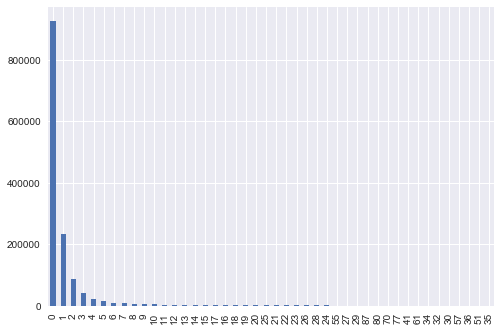

In [86]:
plt.show()

### Subset data based on types of riders - Shared or Single 

In [43]:
df_merged_2.ride_type.value_counts()

standard    904587
shared      463203
Name: ride_type, dtype: int64

In [116]:
df_merged_2.shape

(1367790, 33)

In [117]:
df_merged_2['ride_wait_time_before_accept'] = df_merged_2.ride_wait_time_before_accept.dt.total_seconds()

AttributeError: Can only use .dt accessor with datetimelike values

In [45]:
df_standard = df_merged_2.loc[df_merged_2['ride_type'] == 'standard']
df_shared = df_merged_2.loc[df_merged_2['ride_type'] == 'shared']


### Logistic Regression Model - Standard Customer 

### https://www.statsmodels.org/stable/index.html

In [46]:
df_standard.head()

,ride_id,rider_id,driver_id,ride_type,upfront_fare,rider_paid_amount,eta_to_rider_pre_match,eta_to_rider_post_match,requested_at_local,accepted_at_local,...,ride_location,ride_eta_diff,ride_wait_time_before_accept,dayofweek,weekday_flag,hourofride,rush_hour_flag,ride_count,cancel_count,cancel_rate
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,c5U+DL4S+9Kd8xs0jW3ADg==,standard,12.13,17.40,60.0,21.0,2019-05-04 14:08:33.000 America/Los_Angeles,2019-05-04 14:08:43.775 America/Los_Angeles,...,America/Los_Angeles,-39.0,10.0,5,0,14,0,1,0,0.0
1,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,HBzAE1FuAnArUgou7Qetow==,standard,7.82,8.17,360.0,541.0,2019-05-10 19:26:29.000 America/Los_Angeles,2019-05-10 19:27:00.632 America/Los_Angeles,...,America/Los_Angeles,181.0,31.0,4,1,19,0,1,0,0.0
2,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,MX3XhXFZAjKpEDIRm5QoMg==,standard,14.76,14.82,60.0,126.0,2019-05-10 23:39:07.000 America/Los_Angeles,2019-05-10 23:39:32.725 America/Los_Angeles,...,America/Los_Angeles,66.0,25.0,4,1,23,0,1,0,0.0
3,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,lqj+gQA7gRITBlHwTCM8Rg==,standard,18.05,17.78,360.0,587.0,2019-05-08 13:52:08.000 America/Los_Angeles,2019-05-08 13:53:24.871 America/Los_Angeles,...,America/Los_Angeles,227.0,76.0,2,1,13,0,1,0,0.0
4,KnVKQ9elwO31aM3iCpu0dw==,BKq3XImCug8HXxVMUQpDCA==,cn/zU9H/1KnSAR67BKfpgA==,standard,11.43,11.45,60.0,77.0,2019-05-08 17:24:53.000 America/Los_Angeles,2019-05-08 17:24:59.647 America/Los_Angeles,...,America/Los_Angeles,17.0,6.0,2,1,17,1,2,0,0.0


In [47]:
df_standard.columns

Index(['ride_id', 'rider_id', 'driver_id', 'ride_type', 'upfront_fare',
       'rider_paid_amount', 'eta_to_rider_pre_match',
       'eta_to_rider_post_match', 'requested_at_local', 'accepted_at_local',
       'arrived_at_local', 'picked_up_at_local', 'dropped_off_at_local',
       'actual_time_to_arrival', 'cancellation_flag', 'rider_request_number',
       'variant', 'cancel_penalty', 'ride_requested_time',
       'ride_accepted_time', 'ride_arrived_time', 'ride_pickup_time',
       'ride_dropoff_time', 'ride_location', 'ride_eta_diff',
       'ride_wait_time_before_accept', 'dayofweek', 'weekday_flag',
       'hourofride', 'rush_hour_flag', 'ride_count', 'cancel_count',
       'cancel_rate'],
      dtype='object')

#### Remove all null values - drop NA

In [48]:
df_standard_1 = df_standard[['upfront_fare','eta_to_rider_pre_match','eta_to_rider_post_match',
                            'rider_request_number','cancel_penalty','ride_eta_diff','ride_wait_time_before_accept',
                            'weekday_flag','rush_hour_flag','ride_count','cancel_count','cancel_rate','cancellation_flag']].dropna()



In [49]:
standard_X = df_standard_1.iloc[:,:-1]
standard_Y = df_standard_1.iloc[:,-1]


In [50]:
standard_X.head()

,upfront_fare,eta_to_rider_pre_match,eta_to_rider_post_match,rider_request_number,cancel_penalty,ride_eta_diff,ride_wait_time_before_accept,weekday_flag,rush_hour_flag,ride_count,cancel_count,cancel_rate
0,12.13,60.0,21.0,1,3.0,-39.0,10.0,0,0,1,0,0.0
1,7.82,360.0,541.0,2,1.0,181.0,31.0,1,0,1,0,0.0
2,14.76,60.0,126.0,1,1.0,66.0,25.0,1,0,1,0,0.0
3,18.05,360.0,587.0,1,1.0,227.0,76.0,1,0,1,0,0.0
4,11.43,60.0,77.0,1,5.0,17.0,6.0,1,1,2,0,0.0


In [51]:
standard_Y.value_counts()

0    752452
1    101227
Name: cancellation_flag, dtype: int64

### total_seconds(): https://stackoverflow.com/questions/14920903/time-difference-in-seconds-from-numpy-timedelta64

In [52]:
standard_X.dtypes

upfront_fare                    float64
eta_to_rider_pre_match          float64
eta_to_rider_post_match         float64
rider_request_number              int64
cancel_penalty                  float64
ride_eta_diff                   float64
ride_wait_time_before_accept    float64
weekday_flag                      int64
rush_hour_flag                    int64
ride_count                        int64
cancel_count                      int64
cancel_rate                     float64
dtype: object

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(standard_X, standard_Y,
                                                    test_size=0.1, random_state = 24)



In [54]:
X_train.shape

(768311, 12)

In [62]:
Y_train.shape

(768311,)

#### Use Statsmodels package to build logit model

In [56]:
model_1 = sm.Logit(Y_train, X_train)
result = model_1.fit()

         Current function value: 0.147659
         Iterations: 35


/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [61]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      cancellation_flag   No. Observations:               768311
Model:                          Logit   Df Residuals:                   768300
Method:                           MLE   Df Model:                           10
Date:                Mon, 16 Mar 2020   Pseudo R-squ.:                  0.5945
Time:                        20:45:19   Log-Likelihood:            -1.1345e+05
converged:                      False   LL-Null:                   -2.7976e+05
                                        LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
upfront_fare                    -0.0833      0.001   -121.734      0.000      -0.085      -0.082
eta_to_rider_pre_match          -0.0012        nan        nan        nan         nan         nan
eta_to_rider_post_match          0.0017        nan        nan        nan         nan         nan
rider_request_number            -0.0522      0.003    -20.370      0.000      -0.057      -0.047
cancel_penalty                  -0.5159      0.003   -148.757      0.000      -0.523      -0.509
ride_eta_diff                    0.0029        nan        nan        nan         nan         nan
ride_wait_time_before_accept    -0.0185      0.001    -35.475      0.000      -0.020      -0.017
weekday_flag                    -1.5055      0.013   -112.450      0.000      -1.532      -1.479
rush_hour_flag                   0.6125      0.016     39.355      0.000       0.582       0.643
ride_count                      -0.0627      0.002    -32.160      0.000      -0.066      -0.059
cancel_count                     0.1626      0.006     27.133      0.000       0.151       0.174
cancel_rate                      8.9434      0.041    219.389      0.000       8.864       9.023
================================================================================================
"""

### Tree based model - Xgboost 

In [60]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier


In [64]:
clf = xgb.XGBClassifier(verbosity = 3)
paras_grid = {'max_depth': [6],
              'learning_rate': [0.1]}
model_2 = GridSearchCV(clf, paras_grid, scoring = 'f1', cv = 5)
# model_2 = GridSearchCV(clf, paras_grid, scoring = 'f1', cv = 5)
model_2.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=3),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [6], 'learning_rate': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [65]:
model_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=3)

In [66]:
model_2.best_score_

0.82944774841525093

In [ ]:
X_train.head()

In [67]:
model_2.best_estimator_.feature_importances_

array([ 0.12720157,  0.02778865,  0.1592955 ,  0.09158513,  0.00900196,
        0.16007827,  0.12289628,  0.00978474,  0.01526419,  0.03757339,
        0.02270059,  0.21682975], dtype=float32)

### Shared Rider Model

In [ ]:
df_shared.head()

In [ ]:
df_shared_1 = df_shared[['upfront_fare','eta_to_rider_pre_match','eta_to_rider_post_match',
                         'rider_request_number','cancel_penalty','ride_eta_diff','ride_wait_time_before_accept',
                         'weekday_flag','rush_hour_flag','ride_count','cancel_count','cancel_rate','cancellation_flag']].dropna()

shared_X = df_shared_1.iloc[:,:-1]
shared_Y = df_shared_1.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(shared_X, shared_Y, test_size = 0.1, random_state = 24)


In [ ]:
clf = xgb.XGBClassifier(verbosity = 3)
paras_grid = {'max_depth': [5,6],
              'learning_rate': [0.1]}
model_2 = GridSearchCV(clf, paras_grid, scoring = 'f1', cv = 5)
model_2.fit(X_train,Y_train)


In [ ]:
model_2.best_estimator_

In [ ]:
X_train.head()

In [ ]:
model_2.best_estimator_.feature_importances_

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_1 = LogisticRegression(random_state = 24).fit(X_train,Y_train)

In [ ]:
model_1.get_params()

In [ ]:
model_1.score(X_train,Y_train)

In [ ]:
model_1.classes_

In [ ]:
model_1.coef_

In [ ]:
model_1.intercept_

In [ ]:
df_x_standard.isnull().sum()

In [ ]:
df_x_standard.isnull().sum()

In [ ]:
df_standard.cancellation_flag.value_counts()

In [ ]:
df_merged_2.cancel_rate.value_counts()

In [ ]:
df_merged.sort_values('ride_count', ascending = False)

In [ ]:
df_ride_count.ride_id.unique()

In [ ]:
merged.ride_location.nunique()

In [ ]:
rider.isna().sum() 


In [ ]:
#eta to rider post match nah means cancel while match
#eta to rider pre match nah means cancel 
#accepted at local nah mean no accept
#upfront fare nah 
#arrive at local, pick up, drop off, actually time arrival nah mean cancel, no trip

#add cancellation flag



In [ ]:
#cancel while match
rider[rider['driver_id'].isnull()]


In [ ]:
rider[rider['upfront_fare'].isnull()]
#

In [ ]:
rider[rider['eta_to_rider_pre_match'].isnull()]
#not make sense, co exist with cancellation = 0

In [ ]:
rider[rider['eta_to_rider_post_match'].isnull()]

In [ ]:
# arrive but not pickup, cancel


In [ ]:
rider[rider.cancellation_flag==1].sum()

In [ ]:
rider.describe()

In [ ]:
experiment = pd.read_csv(r'H:\Analytical_Services\Public\sandra guo\home work\experiment_data.csv', engine='python')

In [ ]:
experiment.describe()

In [ ]:
merge = rider.merge(experiment, how='inner', left_on='rider_id', right_on='rider_id')

In [ ]:
merge

In [ ]:
merge.to_excel(r'H:\Analytical_Services\Public\sandra guo\lyft_datafarame.xlsx', sheet_name='sheet1', index=False)


In [ ]:
merge

In [ ]:

merge.isna().sum() 

In [ ]:
#add column eta_to_rider_pre_match and eta_to_rider_post_match>>>>difference in eta might cause cancel
#add column accepted at local - request at local >>>long match time might cause cancel

In [ ]:
merge['requested_at_local2'] =merge['requested_at_local'].str[11:19]
merge['accept_at_local2'] =merge['accepted_at_local'].str[11:19]



In [ ]:
#difference between request and accept
from datetime import datetime
merge['requested_at_local3']= merge['requested_at_local2'].astype(str) 
s1 = merge['requested_at_local3']
y=[]
for i in s1:
    x = datetime.strptime(i,'%H:%M:%S')
    y.append(x)
for i in     

### d1=datetime.strptime(s1,'%H:%M:%S')




In [ ]:
y

In [ ]:
#eta difference
merge['eta_pre_post_match'] = merge['eta_to_rider_post_match'] - merge['eta_to_rider_pre_match']

In [ ]:
#cancellation  pre post match, compare two distribution
#cancellation over $1, $3, $5 penalty, compare general cancellation rate, bar graph
#cancellation upfront fee, compare two distribution
#cancellation eta post match, compare two distribution
#cancellation rider request number, compare distribution



In [ ]:
#merge.groupby('cancel_penalty')['cancellation_flag'].count().plot(kind = 'bar', legend=True)
merge.groupby(['cancel_penalty', 'cancellation_flag']).agg('size').unstack().plot(kind = 'bar', legend=True)



In [ ]:
merge[merge['cancellation_flag']==0]['rider_request_number'].hist(bins=20,range=[0,40], grid=False, figsize=(12,7), color = "skyblue", zorder=2, rwidth=0.9, label = 'cancellation = 0')
merge[merge['cancellation_flag']==1]['rider_request_number'].hist(bins=20,range=[0,40], grid=False, figsize=(12,7), color='#86bf91', zorder=2, rwidth=0.9, label = 'cancellation = 1')
plt.legend()

In [ ]:
merge[merge['cancellation_flag']==0]['eta_to_rider_post_match'].hist(bins=50,range=[0,100], grid=False, figsize=(12,7), color = "skyblue", zorder=2, rwidth=0.9, label = 'cancellation = 0')
merge[merge['cancellation_flag']==1]['eta_to_rider_post_match'].hist(bins=50,range=[0,100], grid=False, figsize=(12,7), color='#86bf91', zorder=2, rwidth=0.9, label = 'cancellation = 1')
plt.legend()

In [ ]:
#merge.hist(column='eta_pre_post_match',bins=100,range=[-300,300], grid=False, figsize=(12,7), color='#86bf91', zorder=2, rwidth=0.9)
merge[merge['cancellation_flag']==0]['upfront_fare'].hist(bins=50,range=[0,100], grid=False, figsize=(12,7), color = "skyblue", zorder=2, rwidth=0.9, label = 'cancellation = 0')
merge[merge['cancellation_flag']==1]['upfront_fare'].hist(bins=50,range=[0,100], grid=False, figsize=(12,7), color='#86bf91', zorder=2, rwidth=0.9, label = 'cancellation = 1')
plt.legend()

In [ ]:
#compare cancellation when eta post match < eta pre match
#merge.hist(column='eta_pre_post_match',bins=100,range=[-300,300], grid=False, figsize=(12,7), color='#86bf91', zorder=2, rwidth=0.9)
merge[merge['cancellation_flag']==0]['eta_pre_post_match'].hist(bins=100,range=[-300,0], grid=False, figsize=(12,7), color = "skyblue", zorder=2, rwidth=0.9, label = 'cancellation = 0')
merge[merge['cancellation_flag']==1]['eta_pre_post_match'].hist(bins=100,range=[-300,0], grid=False, figsize=(12,7), color='#86bf91', zorder=2, rwidth=0.9, label = 'cancellation = 1')
plt.legend()

In [ ]:
#